In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import time

import pandas as pd

In [2]:
data = datasets.load_iris()
print(len(data.feature_names))
print(data.feature_names)
print(len(data.target_names))
print(data.target_names)

4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
3
['setosa' 'versicolor' 'virginica']


In [3]:
df_per = pd.DataFrame(columns=['Data Set', 'F-Measure', 'Accuracy', 'Speed (sec)'])
df_per

,Data Set,F-Measure,Accuracy,Speed (sec)


In [4]:
x = data.data[:, :2] 
y = data.target
target_names = data.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

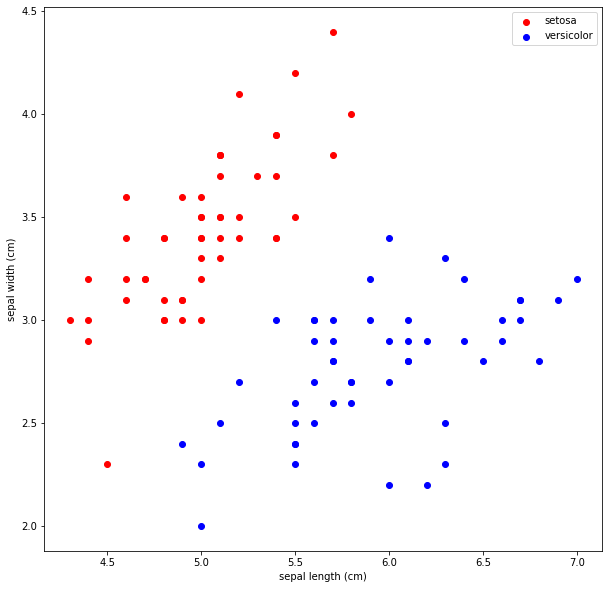

In [5]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x[y == i, 0], x[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()


In [6]:
x = data.data
y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [7]:
start = time.time()
estimator = RandomForestClassifier(n_estimators=200)
estimator.fit(X_train, Y_train)
Y_pred = estimator.predict(X_test)
end = time.time() - start

print('\n Confusion Matrix \n')
print(confusion_matrix(Y_test, Y_pred))
print('\n Classification Report \n')
print(classification_report(Y_test, Y_pred))
print('\n Accuracy \n')
ac = round(accuracy_score(Y_test, Y_pred, normalize=True), 2)
print(ac)
print('\n F-Measure \n')
fm = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
print(fm)
print('\n Speed \n')
print('%.02f second' %end)

df_per.loc[len(df_per)] = ['Original', fm, ac, float('%.02f' %end)]
df_per


 Confusion Matrix 

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]

 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


 Accuracy 

0.97

 F-Measure 

0.97

 Speed 

0.17 second


,Data Set,F-Measure,Accuracy,Speed (sec)
0,Original,0.97,0.97,0.17


## PCA

In [8]:
x = data.data
y = data.target
target_names = data.target_names

In [9]:
pca = PCA(n_components=2)
x_p = pca.fit(x).transform(x)
print('가장 큰 주성분 두 개에 대한 분산: %s' % str(pca.explained_variance_ratio_))

가장 큰 주성분 두 개에 대한 분산: [0.92461872 0.05306648]


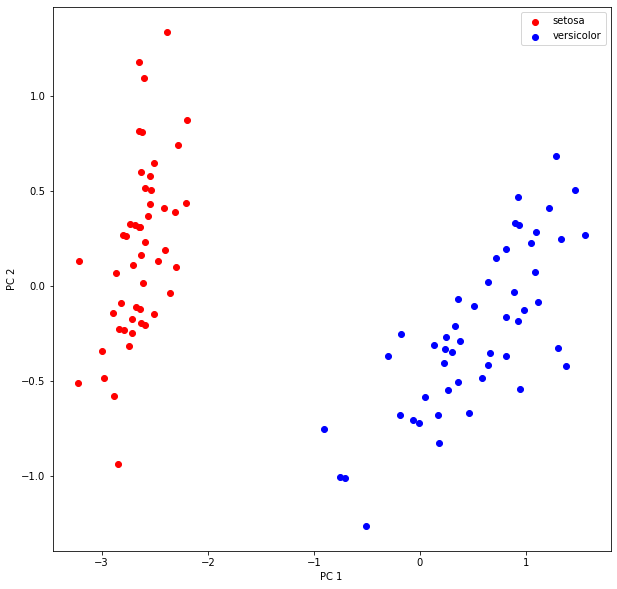

In [10]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_p[y == i, 0], x_p[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [11]:
pca = PCA(n_components=2)
x_p = pca.fit(x).transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_p, y, test_size=0.2)

In [12]:
start = time.time()
estimator = RandomForestClassifier(n_estimators=200)
estimator.fit(X_train, Y_train)
Y_pred = estimator.predict(X_test)
end = time.time() - start

print('\n Confusion Matrix \n')
print(confusion_matrix(Y_test, Y_pred))
print('\n Classification Report \n')
print(classification_report(Y_test, Y_pred))
print('\n Accuracy \n')
ac = round(accuracy_score(Y_test, Y_pred, normalize=True), 2)
print(ac)
print('\n F-Measure \n')
fm = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
print(fm)
print('\n Speed \n')
print('%.02f second' %end)

df_per.loc[len(df_per)] = ['PCA', fm, ac, float('%.02f' %end)]
df_per


 Confusion Matrix 

[[ 7  0  0]
 [ 0  8  2]
 [ 0  0 13]]

 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89        10
           2       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.96      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30


 Accuracy 

0.93

 F-Measure 

0.93

 Speed 

0.16 second


,Data Set,F-Measure,Accuracy,Speed (sec)
0,Original,0.97,0.97,0.17
1,PCA,0.93,0.93,0.16


## LDA

In [13]:
x = data.data
y = data.target
target_names = data.target_names

In [14]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_l = lda.fit(x, y).transform(x)


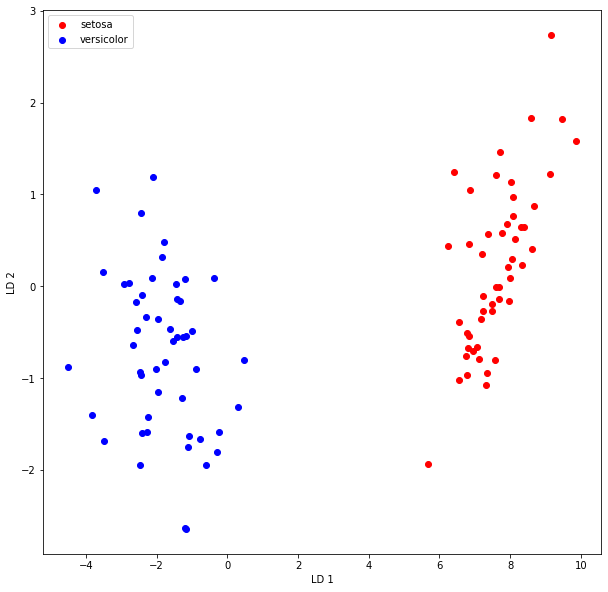

In [15]:
plt.figure(figsize=(10, 10))
colors = ['red', 'blue']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_l[y == i, 0], x_l[y == i, 1], color=color, label=target_name)

plt.legend()
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.show()


In [16]:
lda = LinearDiscriminantAnalysis(n_components=2)
x_l = lda.fit(x, y).transform(x)
X_train, X_test, Y_train, Y_test = train_test_split(x_l, y, test_size=0.2)


In [17]:
start = time.time()
estimator = RandomForestClassifier(n_estimators=200)
estimator.fit(X_train, Y_train)
Y_pred = estimator.predict(X_test)
end = time.time() - start

print('\n Confusion Matrix \n')
print(confusion_matrix(Y_test, Y_pred))
print('\n Classification Report \n')
print(classification_report(Y_test, Y_pred))
print('\n Accuracy \n')
ac = round(accuracy_score(Y_test, Y_pred, normalize=True), 2)
print(ac)
print('\n F-Measure \n')
fm = round(f1_score(Y_test, Y_pred, average='weighted'), 2)
print(fm)
print('\n Speed \n')
print('%.02f second' %end)

df_per.loc[len(df_per)] = ['LDA', fm, ac, float('%.02f' %end)]
df_per


 Confusion Matrix 

[[ 9  0  0]
 [ 0 15  1]
 [ 0  0  5]]

 Classification Report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.94      0.97        16
           2       0.83      1.00      0.91         5

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30


 Accuracy 

0.97

 F-Measure 

0.97

 Speed 

0.17 second


,Data Set,F-Measure,Accuracy,Speed (sec)
0,Original,0.97,0.97,0.17
1,PCA,0.93,0.93,0.16
2,LDA,0.97,0.97,0.17


In [18]:
df_per_1 = df_per.set_index('Data Set')
df_per_1

,F-Measure,Accuracy,Speed (sec)
Data Set,,,
Original,0.97,0.97,0.17
PCA,0.93,0.93,0.16
LDA,0.97,0.97,0.17


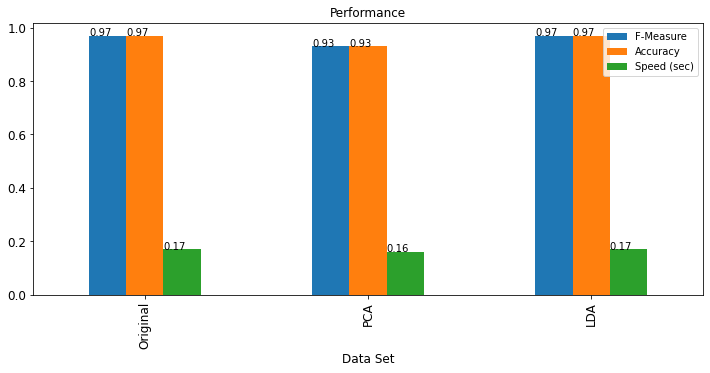

In [19]:
ax = df_per_1[['F-Measure', 'Accuracy', 'Speed (sec)']].plot(kind='bar', title ='Performance',\
                                                             figsize=(12, 5), legend=True, fontsize=12)
ax.set_xlabel('Data Set', fontsize=12)

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

plt.show()